In [46]:
from random import seed
from random import random
import numpy as np 
import matplotlib.pyplot as plt
from scipy import signal
import pylab
import math
import seaborn as sns

In [47]:
class Automatos:
    def __init__(self, matriz, symbols):
        self.matriz = np.array(matriz)
        self.symb = symbols
    def deterministic(self, inter):
        p = []
        i = 0
        for k in range(inter):
            r = random()
            a = 0
            for j in range(len(self.matriz)):
                a = a + self.matriz[i][j]
                if r < a:
                    p.append(self.symb[i])
                    i = j
                    break
        return p
fig1d = [[0.9,0.1,0,0,0,0],
    [0.882,0.98,0.02,0,0,0],
    [0,0,0.2,0.8,0,0],
    [0,0,0.194,0.776,0.03,0],
    [0,0,0,0,0.5,0.5],
    [0.01,0,0,0,0.495,0.495],
    ] #Nesse caso a matriz é para os automatos 0,1,2,3,4,5
fig1e = [
    [0.9,0.1,0,0,0,0],
    [0.882,0.98,0.02,0,0,0],
    [0,0,0.2,0.8,0,0],
    [0,0,0.194,0.776,0.03,0],
    [0,0,0,0,0.5,0.5],
    [0.01,0,0,0,0.495,0.495]
    ] #Nesse caso a matriz é para os automatos 1 e 0
fig1d = Automatos(fig1d, [0,1,0,1,0,1])
padroes_fig1d = fig1d.deterministic(200)
#print(padroes_fig1d)
fig1e = Automatos(fig1e, [0,1,2,3,4,5])
padroes_fig1e = fig1e.deterministic(200)
#print(padroes_fig1e)

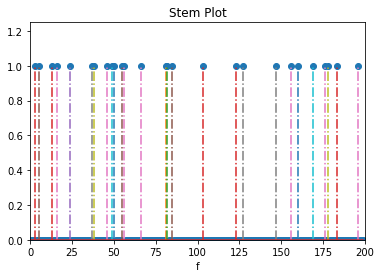

In [48]:
marks = np.arange(inter)


pylab.xlim([0,inter])
pylab.ylim([0,1.25])

#fig, (x1, x2, x3) = plt.subplots(1, 3)

x1 = plt.stem(marks, padroes_fig1d, '-.')
#x2 = plt.stem(marks, padroes_fig1e, '-.')



plt.title('Stem Plot')
plt.xlabel('f')

plt.show()

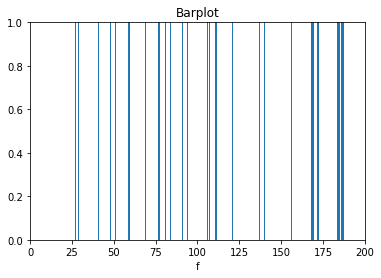

In [49]:
x = np.arange(inter)
#plt.bar(x, padroes_fig1d)
plt.bar(x, padroes_fig1e)

plt.title('Barplot')
plt.xlabel('f')
pylab.xlim(0,inter)
pylab.ylim(0,1)

plt.show()

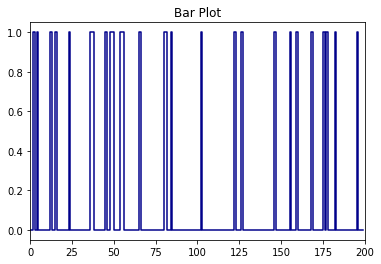

In [50]:
from numpy import arange
plt.title("Bar Plot")
plt.step(arange(0,len(padroes_fig1d)),padroes_fig1d, color = 'darkblue')
plt.xlim(0,len(padroes_fig1d))
plt.show()

In [51]:
import math

media = np.mean(padroes_fig1d)
desvio = np.std(padroes_fig1d)

def probability_density(x):
    pdf = (1/(desvio*math.sqrt(2*math.pi)))*math.exp((-1/2)*((x-media)/desvio)**2)
    return pdf
k = []
for i in range(inter):
    k.append(probability_density(padroes_fig1d[i]))

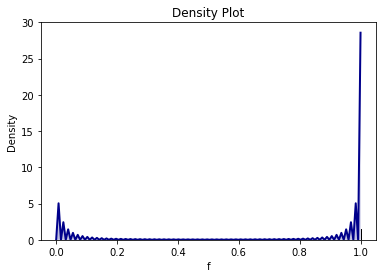

In [52]:
sns.distplot(padroes_fig1d, hist = False, kde = True, rug = True,
             color = 'darkblue', 
             kde_kws={'shade': True, 'linewidth':2},
             rug_kws={'color': 'black'})
#sns.distplot(hl, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
plt.title('Density Plot')
plt.xlabel('f')
plt.ylabel('Density')
plt.show()